In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.statespace as statespace
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('final_daily.csv')
df['date']=pd.to_datetime(df['date'])
df=df[df['date']<datetime.datetime(2023,1,1)]

In [ ]:
df1=df[['date','price']]
df2=df[['date','demand']]

In [ ]:
price_train=df1[df1['date']<datetime.datetime(2022,1,1)]
price_test=df1[df1['date']>=datetime.datetime(2022,1,1)]
demand_train=df2[df2['date']<datetime.datetime(2022,1,1)]
demand_test=df2[df2['date']>=datetime.datetime(2022,1,1)]

In [ ]:
price_train2 = price_train.drop(['date'], axis = 1)

In [ ]:
# price_train=price_train.set_index('Date')
# price_test=price_test.set_index('Date')
# demand_train=demand_train.set_index('Date')
# demand_test=demand_test.set_index('Date')

In [ ]:
# scaler = MinMaxScaler()
# price_train_tmp = scaler.fit_transform(price_train)
# price_test_tmp = scaler.transform(price_test)

In [ ]:
# price_train['Price'] = price_train_tmp
# price_test['Price'] = price_test_tmp

In [ ]:
# # Create a dynamic factor model
# mod_dfm = sm.tsa.DynamicFactorMQ(price_train, k_factors=1, factor_order=2)
# # Note that mod_dfm is an instance of the DynamicFactorMQ class

# # Fit the model via maximum likelihood, using the EM algorithm
# res_dfm = mod_dfm.fit()
# # Note that res_dfm is an instance of the DynamicFactorMQResults class

# # Show the summary of results
# print(res_dfm.summary())

# forecast = res_dfm.predict(start = datetime.datetime(2022,1,1),end=datetime.datetime(2023,1,1),dynamic=True)
# forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
# forecast = pd.DataFrame(forecast).rename(columns={'predicted_mean':'Price'})
# MSE = np.square(forecast-price_test).mean()

In [ ]:
# dat = pd.concat([price_train, demand_train], axis=1)
# scaler2 = MinMaxScaler()
# dat = scaler2.fit_transform(dat)

# m = DynamicFactor(dat, k_factors=1, factor_order=1)
# r = m.fit()
# prediction = r.get_forecast(8760)

# print(prediction.prediction_results.filtered_state)

# prediction = np.array(prediction.prediction_results.forecasts).reshape(-1, 2)

# prediction = scaler2.inverse_transform(prediction)

In [ ]:
dfm_forecast = pd.DataFrame()

for i in range(-365, 0):
    # Create a dynamic factor model
    mod_dfm = sm.tsa.DynamicFactorMQ(df['price'].iloc[:len(df) + i], k_factors=1, factor_order=24)

    # mod_dfm = sm.tsa.DynamicFactorMQ(df['demand'].iloc[:len(df) + i], k_factors=1, factor_order=24)

    # Fit the model via maximum likelihood, using the EM algorithm
    res_dfm = mod_dfm.fit()

    forecast = res_dfm.forecast(steps=1)
    dfm_forecast = pd.concat([dfm_forecast, forecast])

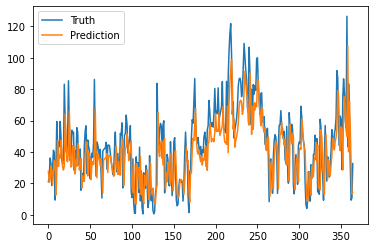

In [ ]:
plt.plot(price_test['price'].reset_index(drop=True), label='Truth')
# plt.plot(demand_test['demand'].reset_index(drop=True), label='Truth')
plt.plot(dfm_forecast.values[:, 0], label='Prediction')
plt.legend()

In [ ]:
np.square(dfm_forecast.values.reshape(-1, 1) - price_test['price'].values.reshape(-1, 1)).mean()
# np.square(dfm_forecast.values.reshape(-1, 1) - demand_test['demand'].values.reshape(-1, 1)).mean()

301.6543532276139

In [ ]:
np.abs(dfm_forecast.values.reshape(-1, 1) - price_test['price'].values.reshape(-1, 1)).mean()
# np.abs(dfm_forecast.values.reshape(-1, 1) - demand_test['demand'].values.reshape(-1, 1)).mean()

13.308240807160207

In [ ]:
def mape(x, y):
  error = abs(x-y)/abs(x)
  error[error > 1] = 1
  return np.mean(error)

mape(dfm_forecast.values.reshape(-1, 1), price_test['price'].values.reshape(-1, 1))
# mape(dfm_forecast.values.reshape(-1, 1),demand_test['demand'].values.reshape(-1, 1))

0.37625822934836045

In [ ]:
# np.square(df["1_lag_pred"].tail(365) - price_test['price'].values).mean()

In [ ]:
# np.abs(df["1_lag_pred"].tail(365) - price_test['price'].values).mean()